Question: Obesity detection Model
Background:
    
You are a data scientist working for a health and wellness company that aims to promote healthy living and combat obesity.
The company has collected data from individuals regarding their demographic information, eating habits, and physical condition.
Your task is to develop a machine learning model that can accurately predict the weight category of individuals based on these 
factors.



The goal of the model is to help individuals understand their risk of obesity based on their lifestyle choices and provide
personalized recommendations for healthier living. By accurately predicting obesity risk, the company aims to empower 
individuals to make informed decisions about their health and well-being.

Dataset Description:
    
•Gender

•Age

•Height

•Weight

•Eating Habits:
    
    o FAVC: Frequent consumption of high caloric food
    o FCVC- Frequency of consumption of vegetables
    o NCP: Number of main meals per day
    o CAEC: Consumption of food between meals
    o CH2O: Consumption of water daily
    o CALC: Consumption of alcohol
        
•Physical Condition:
    
    o SCC: Calories consumption monitoring
    o FAF: Physical activity frequency
    o TUE: Time using technology devices
    o MTRANS: Transportation used

Task:
    
    
Your task is to Build a machine learning model to predict the weight category of individuals based on their demographic 
information, eating habits, and physical condition.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

## Read the dataset

In [2]:
df = pd.read_csv(r'C:\Users\LENOVO\Desktop\DSA\datasets\Obesity.csv')

## Exploratory data Analysis

In [3]:
# view the first few rows

df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# rows and columns in the dataset

df.shape

(2111, 17)

In [5]:
# checking the datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2102 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2101 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2105 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2102 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2104 non-null   object 
 12  FAF                             21

In [6]:
# statistical analysis

df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2101.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.488346,1.701995,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,7.365358,0.093288,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,2.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.804818,1.701284,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768834,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,99.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [7]:
# number of missing values

df.isna().sum()

Gender                             9
Age                                0
Height                            10
Weight                             0
family_history_with_overweight     6
FAVC                               0
FCVC                               0
NCP                                0
CAEC                               9
SMOKE                              0
CH2O                               0
SCC                                7
FAF                                0
TUE                                0
CALC                               0
MTRANS                             7
NObeyesdad                         0
dtype: int64

The columns Height,family_history_with_overweight,CAEC ,SCC,MTRANS contains missing values

## Data Visualization

In [8]:
df.Gender.value_counts()

Male      1061
Female    1041
Name: Gender, dtype: int64

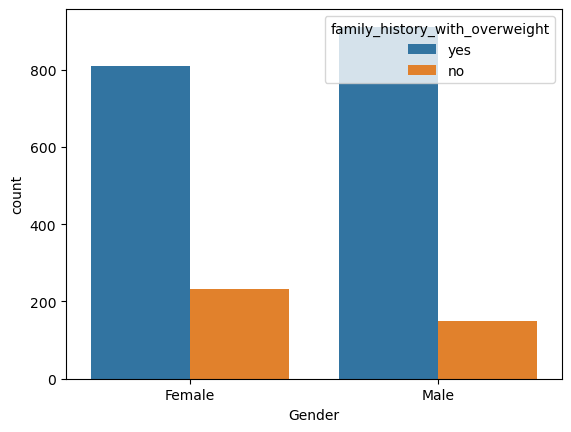

In [9]:
## countplot of Gender wrt family_history_with_overweight

sns.countplot(x='Gender', data=df,hue='family_history_with_overweight' )
plt.xlabel('Gender')
plt.ylabel('count')
plt.show()

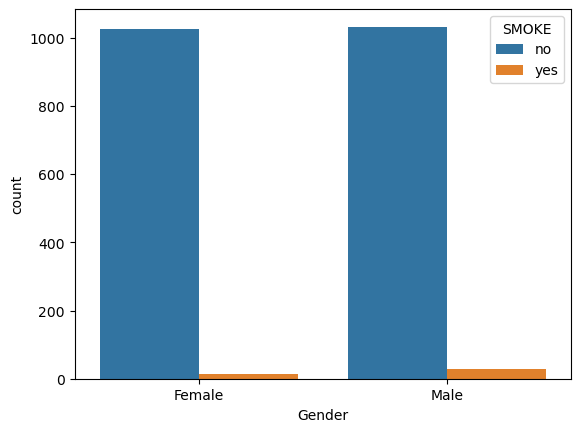

In [10]:
## countplot of Gender wrt smoking habit

sns.countplot(x='Gender', data=df,hue='SMOKE' )
plt.xlabel('Gender')
plt.ylabel('count')
plt.show()

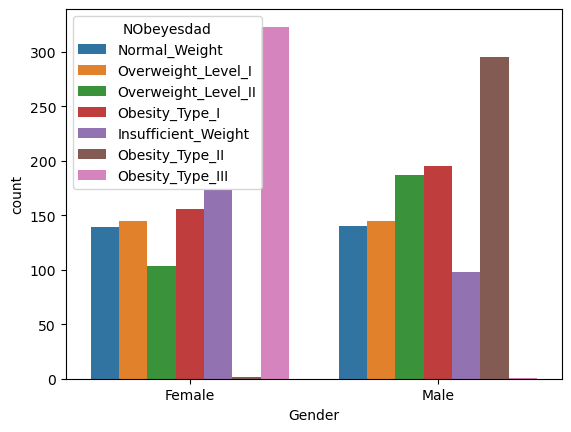

In [11]:
## countplot of Gender wrt NOBeyesdad

sns.countplot(x='Gender', data=df,hue='NObeyesdad' )
plt.xlabel('Gender')
plt.ylabel('count')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9972\3237795141.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


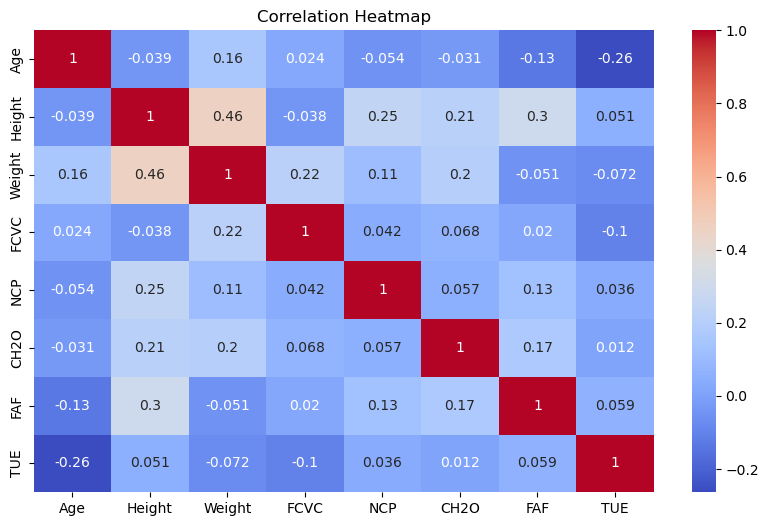

In [12]:
# Correlation heatmap

correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Data Preprocessing

In [13]:
print(df.isnull().sum())

Gender                             9
Age                                0
Height                            10
Weight                             0
family_history_with_overweight     6
FAVC                               0
FCVC                               0
NCP                                0
CAEC                               9
SMOKE                              0
CH2O                               0
SCC                                7
FAF                                0
TUE                                0
CALC                               0
MTRANS                             7
NObeyesdad                         0
dtype: int64


In [14]:
# importing missing values

# Impute missing values in the 'Height' columnnwith the mean
data = df

data['Height'] = data['Height'].fillna(data['Height'].mean())

In [15]:
# Impute missing values in all other columnnwith the mode

data = data.fillna(data.mode().iloc[0])

In [16]:
data.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

## Checking for outliers

<Axes: >

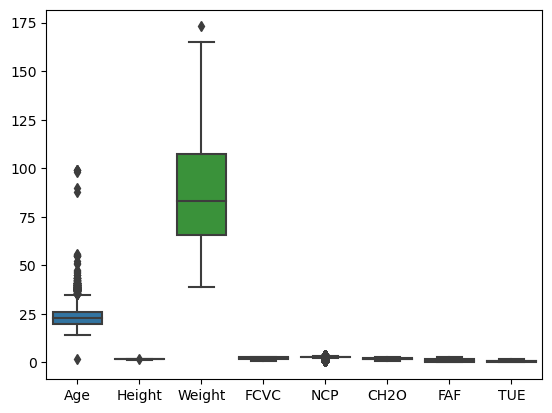

In [17]:
sns.boxplot(data=data)

## Removing outliers

Old Shape:  (2111, 17)
New Shape:  (1937, 17)


<Axes: xlabel='Age'>

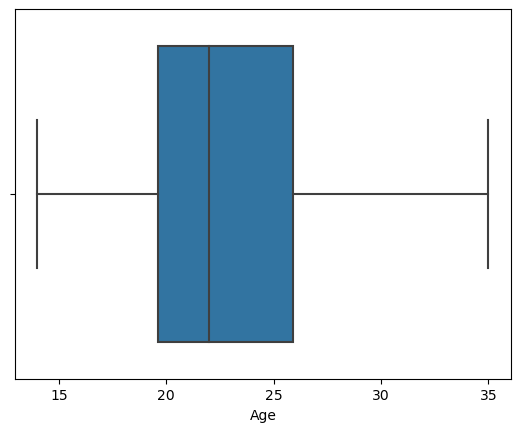

In [18]:
# Removing outliers in Age column
# Calculate the IQR
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1

print("Old Shape: ", data.shape)
# Define a threshold for identifying outliers (e.g., 1.5 times the IQR)
threshold = 1.5

# Identify the outliers
# Upper bound
upper = np.where(data['Age'] >= (Q3+1.5*IQR))
 
# Lower bound
lower = np.where(data['Age'] <= (Q1-1.5*IQR))
 
# Removing the Outliers
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
 
print("New Shape: ", data.shape)
 
sns.boxplot(x='Age', data=data)

Old Shape:  (1937, 17)
New Shape:  (1937, 17)


<Axes: xlabel='Weight'>

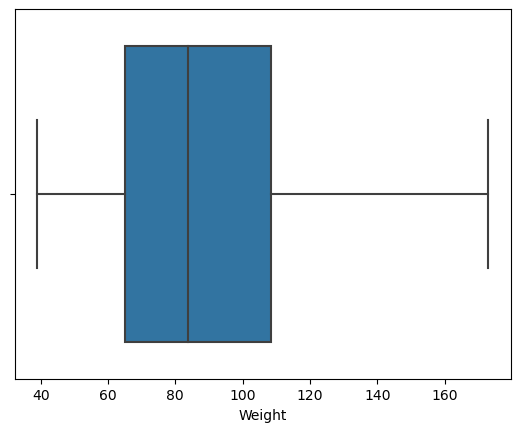

In [19]:
# Removing outliers in Weight column
# Calculate the IQR
Q1 = data['Weight'].quantile(0.25)
Q3 = data['Weight'].quantile(0.75)
IQR = Q3 - Q1

print("Old Shape: ", data.shape)
# Define a threshold for identifying outliers (e.g., 1.5 times the IQR)
threshold = 1.5

# Identify the outliers
# Upper bound
upper = np.where(data['Weight'] >= (Q3+1.5*IQR))
 
# Lower bound
lower = np.where(data['Weight'] <= (Q1-1.5*IQR))
 
# Removing the Outliers
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
 
print("New Shape: ", data.shape)
 
sns.boxplot(x='Weight', data=data)

In [20]:
data.shape

(1937, 17)

In [21]:
df.Gender.value_counts()

Male      1061
Female    1041
Name: Gender, dtype: int64

In [22]:
## Assigning numerical values 

Gender = {"Male": 0, "Female": 1} 
data['Gender'] = data['Gender'].map(Gender) 

family_history_with_overweight  = {"yes": 1, "no": 0} 
data['family_history_with_overweight'] = data['family_history_with_overweight'].map(family_history_with_overweight) 


NObeyesdad = {"Obesity_Type_I": 0, "Obesity_Type_II": 1, "Obesity_Type_III": 2,"Overweight_Level_I": 3,"Overweight_Level_II": 4,"Normal_Weight": 5,"Insufficient_Weight": 6}
data['NObeyesdad'] = data['NObeyesdad'].map(NObeyesdad)

In [23]:
data.NObeyesdad.value_counts()

2    324
0    281
5    276
6    271
1    268
3    266
4    251
Name: NObeyesdad, dtype: int64

In [24]:
FAVC = {"yes": 1, "no": 0} 
data['FAVC'] = data['FAVC'].map(FAVC) 

CAEC = {"Sometimes": 0, "Frequently": 1, "Always": 2,"no": 3} 
data['CAEC'] = data['CAEC'].map(CAEC) 

SMOKE = {"yes": 1, "no": 0} 
data['SMOKE'] = data['SMOKE'].map(SMOKE) 

SCC = {"yes": 1, "no": 0} 
data['SCC'] = data['SCC'].map(SCC) 

CALC = {"Sometimes": 0, "Frequently": 1, "Always": 2,"no": 3} 
data['CALC'] = data['CALC'].map(CALC) 

MTRANS = {"Public_Transportation": 0, "Automobile": 1, "Walking": 2,"Motorbike": 3,"Bike": 4} 
data['MTRANS'] = data['MTRANS'].map(MTRANS)

In [25]:
## Creating feature and target variable

#Creating dataframe for features
X = data[['Gender','Age','Height','family_history_with_overweight','FAVC','FCVC','NCP','CAEC','SMOKE','CH2O','SCC','FAF','TUE','CALC','MTRANS','NObeyesdad']]

#Creating dataframe for target
y = data['Weight']

In [26]:
print(X.shape, y.shape)

(1937, 16) (1937,)


In [27]:
#Splitting the dataset into train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1549, 16) (388, 16) (1549,) (388,)


## Feature selection

In [28]:
# Scale the input features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Building and Evaluation

### Linear Regression

In [29]:
# Create a Linear Regression model
lr_model = LinearRegression()

# Train the model on the training set
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test) 
y_pred

array([ 45.7586067 ,  61.58948196,  79.20330678, 107.29795281,
       111.84290505, 138.70082119, 104.82782846,  85.84986236,
       108.0519559 ,  78.40152354,  89.16337036, 106.31845158,
        51.58908122, 105.04788053, 109.02260569,  66.13935235,
        89.10880765,  97.32423744,  66.76141965,  81.2534811 ,
        78.70626355,  50.76875046,  71.82412375,  72.85205055,
        85.91307542,  64.75273062, 103.42212327, 102.89610007,
       103.1822698 ,  35.80337281,  64.45776627,  94.02286126,
       109.75397364, 109.36300223,  72.56122938, 107.6135373 ,
        42.85217044, 101.14419914, 119.32264912,  49.34981571,
        31.60885356, 110.43179823,  98.58372742,  72.8817223 ,
       103.18630734, 100.51502579, 115.20135617,  31.94742042,
        74.41541621,  58.04046841,  58.69835436, 117.20346948,
       114.20720346,  56.3956357 ,  61.20512013, 105.53560867,
        72.01503762,  80.07926239,  65.54121052, 124.61446214,
       117.86982182, 101.64885596, 122.79117506, 100.76

In [30]:
accuracy_lr = lr_model.score(X_test, y_pred)
print(accuracy_lr)

1.0


In [31]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error #MAE

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Assuming y_pred and y_test are NumPy arrays or similar data structures
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'RMSE: {rmse:.2f}')

from sklearn.metrics import r2_score
# Assuming y_pred and y_test are NumPy arrays or similar data structures
r2 = r2_score(y_test, y_pred)

print(f'R^2 Score: {r2:.2f}')

Mean Absolute Error: 9.402632832959393
Mean Squared Error: 143.17669783059802
RMSE: 11.97
R^2 Score: 0.80


### Random Forest

In [37]:
rf_model = RandomForestRegressor(n_estimators= 100, max_depth=25) #Instantiate an object

rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_pred = lr_model.predict(X_test) 
rf_pred

array([ 45.7586067 ,  61.58948196,  79.20330678, 107.29795281,
       111.84290505, 138.70082119, 104.82782846,  85.84986236,
       108.0519559 ,  78.40152354,  89.16337036, 106.31845158,
        51.58908122, 105.04788053, 109.02260569,  66.13935235,
        89.10880765,  97.32423744,  66.76141965,  81.2534811 ,
        78.70626355,  50.76875046,  71.82412375,  72.85205055,
        85.91307542,  64.75273062, 103.42212327, 102.89610007,
       103.1822698 ,  35.80337281,  64.45776627,  94.02286126,
       109.75397364, 109.36300223,  72.56122938, 107.6135373 ,
        42.85217044, 101.14419914, 119.32264912,  49.34981571,
        31.60885356, 110.43179823,  98.58372742,  72.8817223 ,
       103.18630734, 100.51502579, 115.20135617,  31.94742042,
        74.41541621,  58.04046841,  58.69835436, 117.20346948,
       114.20720346,  56.3956357 ,  61.20512013, 105.53560867,
        72.01503762,  80.07926239,  65.54121052, 124.61446214,
       117.86982182, 101.64885596, 122.79117506, 100.76

In [34]:
accuracy_dr = rf_model.score(X_test, rf_pred)
accuracy_dr

0.7742582952209778

In [35]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error #MAE

mae = mean_absolute_error(y_test, rf_pred)
print(f'Mean Absolute Error: {mae}')

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, rf_pred)
print(f'Mean Squared Error: {mse}')

# Assuming y_pred and y_test are NumPy arrays or similar data structures
rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print(f'RMSE: {rmse:.2f}')

from sklearn.metrics import r2_score
# Assuming y_pred and y_test are NumPy arrays or similar data structures
r2 = r2_score(y_test, rf_pred)

print(f'R^2 Score: {r2:.2f}')

Mean Absolute Error: 9.402632832959393
Mean Squared Error: 143.17669783059802
RMSE: 11.97
R^2 Score: 0.80


## Conclusion

From this two models, we can analyze that

Linear Regression has the best performance in terms of accuracy ,with the lowest MAE,MSE,RMSE Values


